In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('vaccination_tweets.csv')

In [3]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Time Series Analysis
# Create a time series DataFrame with date as index
ts_df = df.set_index('date')

In [5]:
# Resample the time series data to daily frequency and count the number of tweets per day
ts_daily = ts_df.resample('D').size()

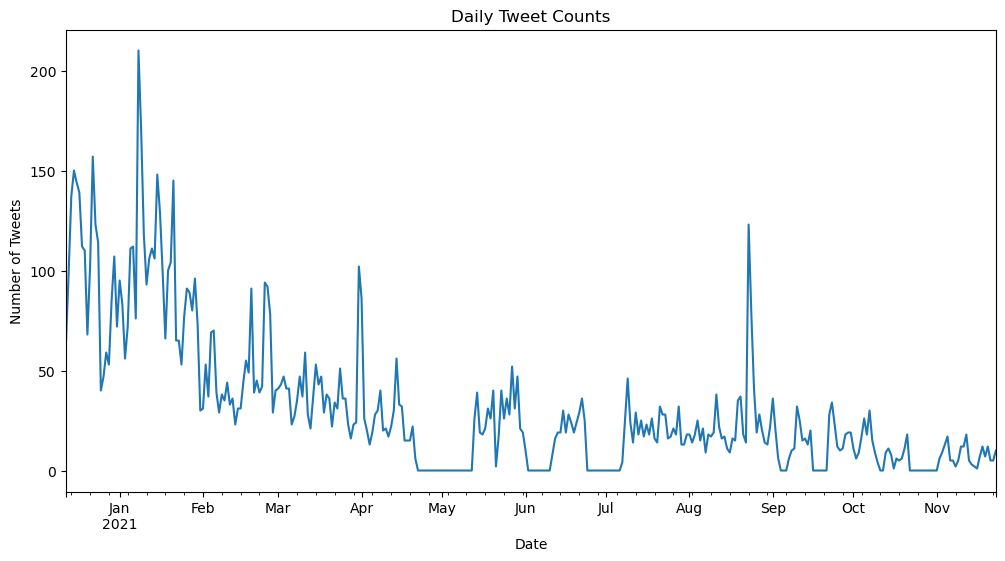

In [6]:
# Plot the daily tweet counts
plt.figure(figsize=(12, 6))
ts_daily.plot()
plt.title('Daily Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [7]:
# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(ts_daily, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

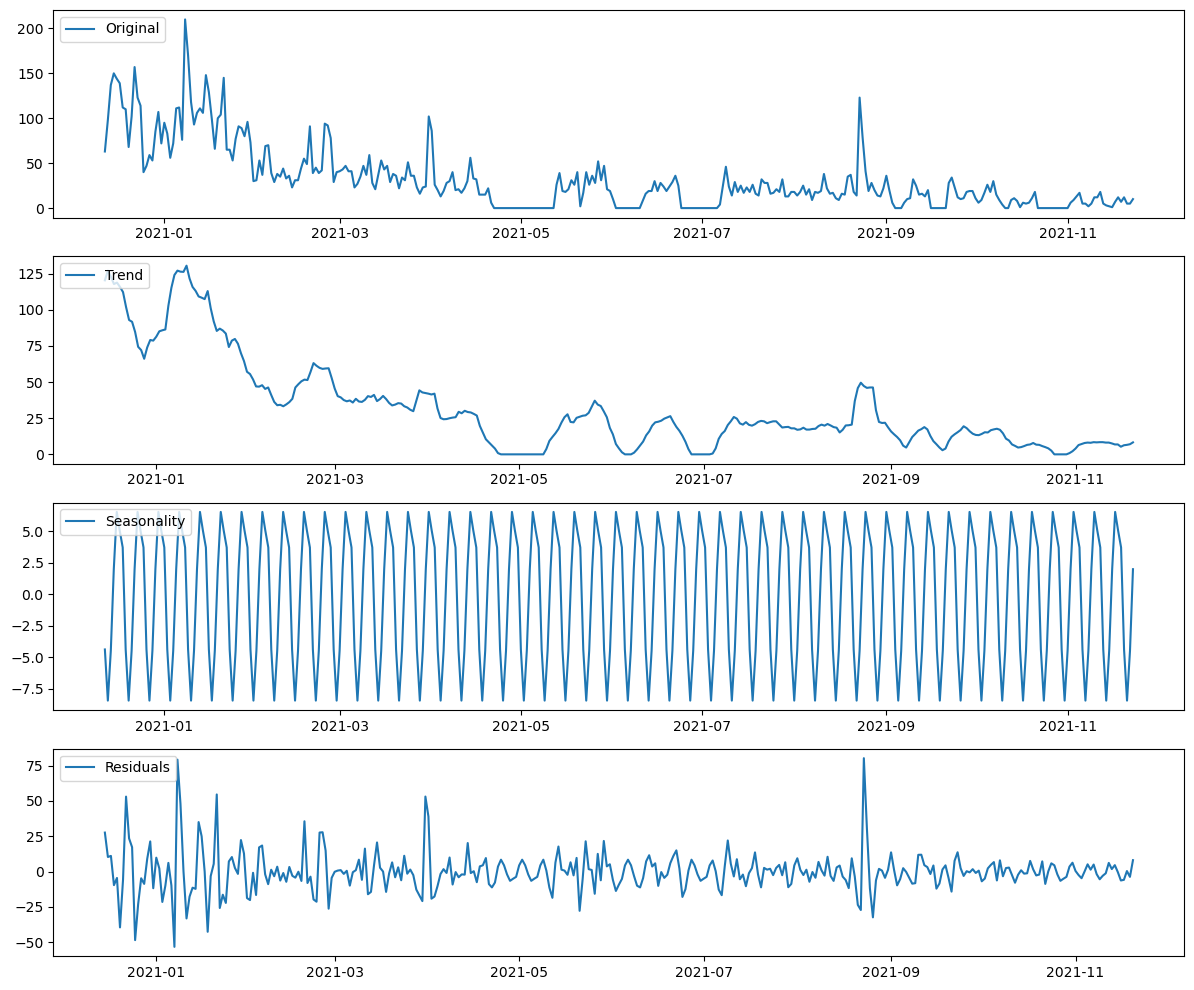

In [8]:
# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(ts_daily, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Sentiment Analysis
# Instantiate the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smdfa\AppData\Roaming\nltk_data...


True

In [12]:
# Apply sentiment analysis to each tweet
df['sentiment'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])


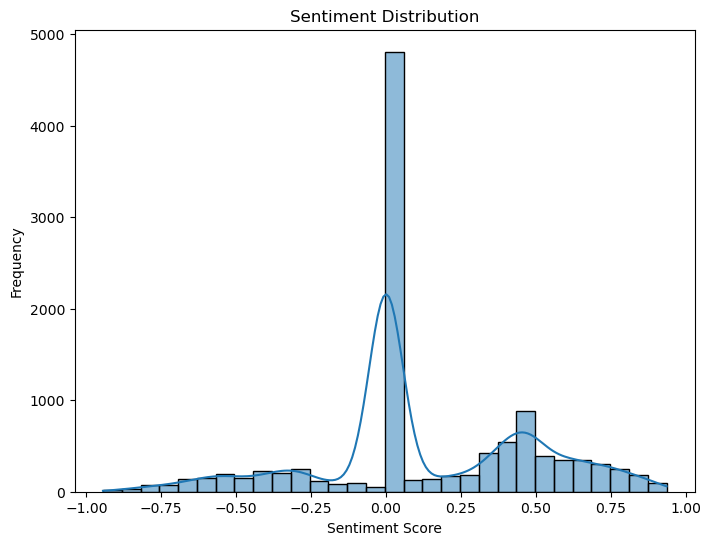

In [13]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Clustering
# Apply TF-IDF Vectorization to text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(df['text'])

In [15]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf)

KMeans(n_clusters=5, random_state=42)

In [16]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2, random_state=42)
tfidf_pca = pca.fit_transform(tfidf.toarray())

In [17]:
# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

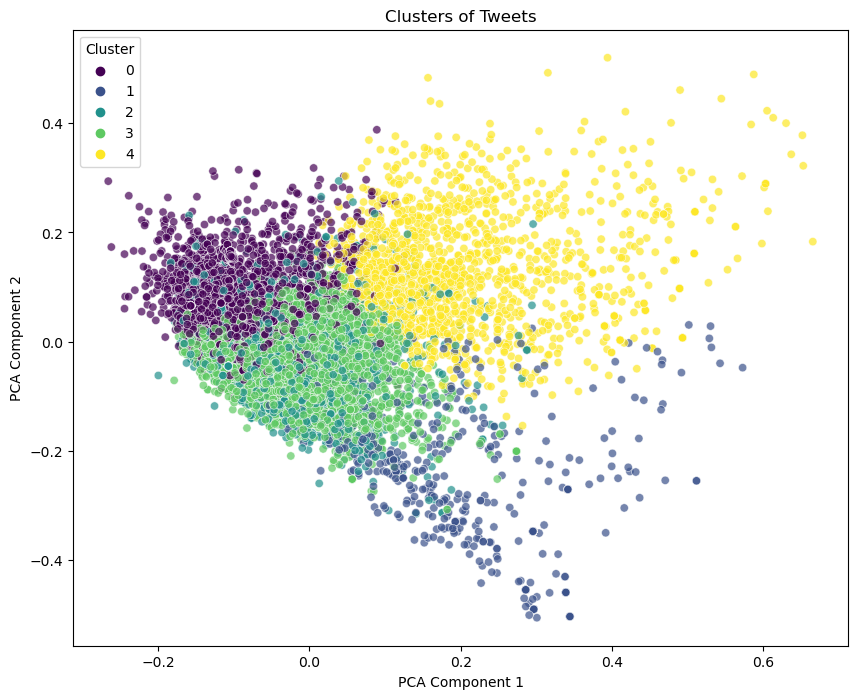

In [19]:
# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title('Clusters of Tweets')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()